In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Fruits.csv')

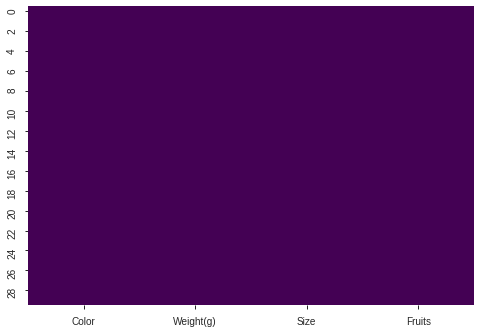

In [4]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
data.columns

Index(['Color', 'Weight(g)', 'Size', 'Fruits'], dtype='object')

In [22]:
data['Color']

0        Red
1        Red
2     Orange
3        Red
4      Green
5        Red
6        Red
7      Green
8      Green
9        Red
10     Green
11       Red
12       Red
13       Red
14       Red
15       Red
16    Orange
17       Red
18    Orange
19       Red
20       Red
21       Red
22       Red
23     Green
24    Orange
25       Red
26     Green
27     Green
28       Red
29       Red
Name: Color, dtype: object

In [23]:
dig={'Red':1,'Green':0,'Orange':2}
data['Color']=data['Color'].map(dig)

In [25]:
size={'Small':0,'Big':1,'Medium':2}
data['Size']=data['Size'].map(size)

In [26]:
data

,Color,Weight(g),Size,Fruits
0,1,70,0,Apple
1,1,100,1,Apple
2,2,28,2,Plums
3,1,3,0,Cherry
4,0,100,1,Apple
5,1,100,1,Apple
6,1,3,0,Cherry
7,0,70,0,Apple
8,0,70,0,Apple
9,1,7,0,Cherry


In [27]:
fruit={'Apple':0,'Plums':1,'Cherry':2}
data['Fruits']=data['Fruits'].map(fruit)

In [28]:
data.head(2)

,Color,Weight(g),Size,Fruits
0,1,70,0,0
1,1,100,1,0


In [30]:
data.columns

Index(['Color', 'Weight(g)', 'Size', 'Fruits'], dtype='object')

In [29]:
model=LogisticRegression()

In [157]:
x=data[['Size','Weight(g)','Color']]
y=data['Fruits']
y

0     0
1     0
2     1
3     2
4     0
5     0
6     2
7     0
8     0
9     2
10    1
11    2
12    1
13    2
14    0
15    1
16    1
17    2
18    1
19    2
20    0
21    2
22    2
23    0
24    1
25    2
26    1
27    0
28    1
29    1
Name: Fruits, dtype: int64

In [158]:
#model
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.15,random_state=25)

In [159]:
x_trine.shape

(25, 3)

In [160]:
x_test.shape

(5, 3)

In [161]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(x_trine,y_trine)
y_predict=model.predict(x_test)

In [162]:
trine_score=model.score(x_trine,y_trine)
trine_score

1.0

In [163]:
test_score=model.score(x_test,y_test)
test_score

1.0

In [164]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
19,2,2
11,2,2
2,1,1
9,2,2
24,1,1


In [165]:
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(x,y)

In [166]:
rfe.support_

array([ True,  True,  True])

In [167]:
data.head(3)

,Color,Weight(g),Size,Fruits
0,1,70,0,0
1,1,100,1,0
2,2,28,2,1


In [168]:
x.shape

(30, 3)

In [169]:
x.head()

,Size,Weight(g),Color
0,0,70,1
1,1,100,1
2,2,28,2
3,0,3,1
4,1,100,0


In [170]:
XX = x[x.columns[rfe.support_]]
XX

,Size,Weight(g),Color
0,0,70,1
1,1,100,1
2,2,28,2
3,0,3,1
4,1,100,0
5,1,100,1
6,0,3,1
7,0,70,0
8,0,70,0
9,0,7,1


In [171]:
x_train, x_test, y_train, y_test = train_test_split(XX, y, test_size = 0.15, random_state = 5, stratify = y)

In [172]:
x_train.shape

(25, 3)

In [173]:
x_test.shape

(5, 3)

In [174]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [175]:
trine_score=model.score(x_train,y_train)
trine_score

1.0

In [176]:
test_score=model.score(x_test, y_test)
test_score

1.0

In [177]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [178]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [179]:
y_test

2     1
13    2
29    1
14    0
6     2
Name: Fruits, dtype: int64

In [180]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [181]:
from sklearn import preprocessing

In [183]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
#print('log loss: ', log_loss(y_test, y_predict_prob))
#print('auc: ', auc(fpr, tpr))

Accuracy:  1.0
